
# <center>Bulldozers Prices Prediction</center>


## <center> YAPO Jean </center>


In [4]:
# We import the librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor

Link to upload the dataset : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

In [11]:
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv", low_memory= False)

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
#Missing Values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

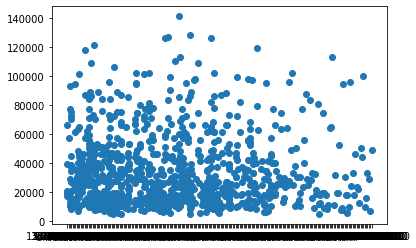

In [12]:
fig, ax =plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

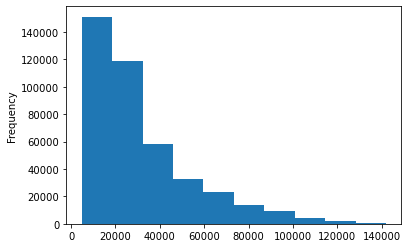

In [7]:
df["SalePrice"].plot.hist();

### Parsing Date (case of time series data)

In [13]:
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv", low_memory= False, parse_dates=["saledate"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

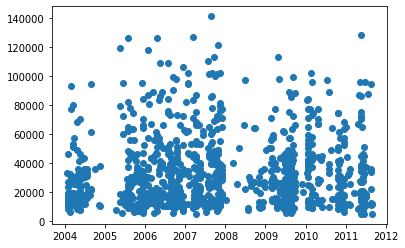

In [22]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Sort DataFrame by saledate

In [12]:
df.sort_values(by= ["saledate"], inplace= True)
df.head(20)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_tmp = df.copy()


## Feature engineering

In [14]:
# We create three new variables (SaleDay, SaleMonth, SaleYear) by using SaleDate
df_tmp["SaleDay"] =  df_tmp.saledate.dt.day
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleYear"] = df_tmp.saledate.dt.year

In [15]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleDay,SaleMonth,SaleYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,17,1,1989
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,31,1,1989
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,31,1,1989
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,31,1,1989
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,31,1,1989


In [16]:
df_tmp.drop("saledate", axis= 1, inplace= True)

In [17]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Turning data into numbers

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [19]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [20]:
#We display all the features containing string variables
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
for label, content in df_tmp.items() :
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [25]:
#Percentage of missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [26]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### save the preprocessed data

In [27]:
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index= False)

In [28]:
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",low_memory= False)

In [29]:
for label, content in df_tmp.items() :
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

## Splitting data

In [31]:
df_val = df_tmp[df_tmp["SaleYear"] == 2012 ]
df_train = df_tmp[df_tmp["SaleYear"] != 2012]

len(df_val), len(df_train)

(11573, 401125)

## Fill missing value

### Numerical values

In [32]:
# We fill missing numerical values with the median
def fill_miss_num_val (df):
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
            
             

In [33]:
fill_miss_num_val(df_train)
fill_miss_num_val(df_val)

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\179395035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\179395035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\179395035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

### Filling and turning categorical variables into numbers

In [34]:
def fill_miss_cat_val (df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

In [35]:
fill_miss_cat_val(df_train)
fill_miss_cat_val(df_val)

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label + "_is_missing"] = pd.isnull(content)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes + 1
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\2110664692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [58]:
df_train.drop("SalePrice_is_missing", axis= 1, inplace= True)
df_val.drop("SalePrice_is_missing", axis= 1, inplace= True)

C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\767078903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop("SalePrice_is_missing", axis= 1, inplace= True)
C:\Users\Solutech-PC\AppData\Local\Temp\ipykernel_14476\767078903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop("SalePrice_is_missing", axis= 1, inplace= True)


In [59]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 401125 to 412697
Columns: 109 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(54), float64(3), int16(4), int64(8), int8(40)
memory usage: 2.2 MB


In [60]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 401125 to 412697
Columns: 109 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(54), float64(3), int16(4), int64(8), int8(40)
memory usage: 2.2 MB


%%time
model = RandomForestRegressor(n_jobs= -1, random_state= 42)
model.fit(df_tmp.drop("SalePrice", index= 1), df_tmp["SalePrice"])


## Splitting data

In [61]:
x_train , y_train = df_train.drop("SalePrice", axis= 1), df_train["SalePrice"]

x_test, y_test = df_val.drop("SalePrice", axis= 1), df_val["SalePrice"]

## Building an evaluation function

In [62]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle (y_test, y_preds) :
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores (model):
    train_preds = model.predict(x_train_4)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train_4, train_preds), 
              "Val MAE": mean_absolute_error(y_test, val_preds),
              "Training rmsle": rmsle(y_train_4, train_preds),
              "val rmsle": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train_4, train_preds),
              "Val R^2": r2_score(y_test, val_preds)}
    return scores

## Modelling

In [63]:
x_train_1, y_train_1 = x_train[:100281], y_train[:100281]
x_train_2, y_train_2 = x_train[100281:200562], y_train[100281:200562]
x_train_3, y_train_3 = x_train[200562:300843], y_train[200562:300843]
x_train_4, y_train_4 = x_train[300843:], y_train[300843:]

# model = RandomForestRegressor()
# model = RandomForestRegressor(n_jobs= -1, random_state= 42) 

# model.fit(x_train_1, y_train_1)
# model.fit(x_train_2, y_train_2)
# model.fit(x_train_3, y_train_3)
# model.fit(x_train_4, y_train_4)

In [41]:
%%time
model = RandomForestRegressor(n_jobs = -1, random_state=42, max_samples=10000)
model.fit(x_train_4, y_train_4)

CPU times: total: 47.7 s
Wall time: 12.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [42]:
show_scores(model)

{'Training MAE': 4799.2735633513485,
 'Val MAE': 6791.834997839799,
 'Training rmsle': 0.22800892002787454,
 'val rmsle': 0.2829545848001279,
 'Training R^2': 0.8980485017071812,
 'Val R^2': 0.8485384635772723}

## Tuning Hyperparameters

In [67]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": np.arange(10, 100, 10),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "max_features": [0.5,  1, "sqrt", "auto"]
    }

rs_model = RandomizedSearchCV( RandomForestRegressor(n_jobs=-1, random_state= 42, max_samples= 100000),
                              param_distributions= grid,
                              n_iter= 5,
                              cv= 5,
                              verbose= True
)
rs_model.fit(x_train_4, y_train_4)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Solutech-PC\Desktop\heart_desease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Solutech-PC\Desktop\heart_desease_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Solutech-PC\Desktop\heart_desease_project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Solutech-PC\Desktop\heart_desease_project\env\lib\sit

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=100000,
                                                   n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'max_features': 0.5,
 'max_depth': None}

In [69]:
show_scores(rs_model)

{'Training MAE': 2170.5316983502667,
 'Val MAE': 6078.284962805126,
 'Training rmsle': 0.11073405893893144,
 'val rmsle': 0.25135257497778346,
 'Training R^2': 0.977000522595724,
 'Val R^2': 0.8747604564229536}

In [70]:
ideal_model= RandomForestRegressor(n_estimators= 40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features= 0.5,
                                   n_jobs= -1,
                                   max_samples= None)

In [71]:
ideal_model.fit(x_train_4, y_train_4)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [72]:
show_scores(ideal_model)

{'Training MAE': 3051.319870637043,
 'Val MAE': 6085.268689015567,
 'Training rmsle': 0.14775335340899345,
 'val rmsle': 0.25102451124021125,
 'Training R^2': 0.9571920154371575,
 'Val R^2': 0.8750641150607272}

## Preprocessed data 

In [79]:
df_test = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv", low_memory= False, parse_dates= ["saledate"])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [80]:
def preprocess_date(df):
    
    df["SaleDay"] =  df.saledate.dt.day
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleYear"] = df.saledate.dt.year
    df.drop("saledate", axis= 1, inplace= True)
    
    for label, content in df.items() :
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    fill_miss_num_val(df)
    fill_miss_cat_val(df)
    
    return(df)

In [81]:
df_test = preprocess_date(df_test)

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 108 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(54), float64(1), int16(2), int64(9), int8(42)
memory usage: 2.1 MB


In [84]:
test_preds = ideal_model.predict(df_test)

In [85]:
df_preds = pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalePrice"]= test_preds


## Feature Importance (We obverse the features with the most impact on the model)

In [88]:
len(ideal_model.feature_importances_)

108

In [99]:
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({"features": columns,
                       "features_importances": importances})
         .sort_values("features_importances", ascending= False)
         .reset_index(drop=True))
    
    fig,ax = plt.subplots()
    ax.barh(df["features"][:20], df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")

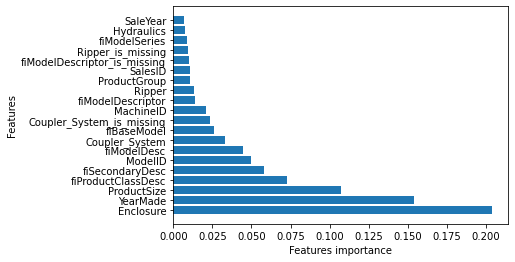

In [100]:
plot_features(x_train.columns, ideal_model.feature_importances_)